<a href="https://colab.research.google.com/github/Raghad770/VGG11-13-16-19-implementation-with-Keras/blob/main/Visualize_Model_Training_History_of_VGG11%2CVGG13%2CVGG16%2CVGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the trainig history for vgg11,13,16,19 models

In [1]:
import pickle
history_11 = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/VGG16/trainHistoryDict_11',"rb"))
history_13 = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/VGG16/trainHistoryDict_13',"rb"))
history_16 = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/VGG16/trainHistoryDict_16',"rb"))
history_19 = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/VGG16/trainHistoryDict_19',"rb"))

In [2]:
print(history_11)
print(history_13)
print(history_16)
print(history_19)

{'loss': [0.9808911681175232, 0.7660500407218933, 0.6457832455635071, 0.5116069912910461, 0.4373207688331604, 0.36488330364227295, 0.3087712824344635, 0.26838791370391846, 0.21235859394073486, 0.16323140263557434], 'accuracy': [0.6164096593856812, 0.7065035104751587, 0.758632242679596, 0.8165437579154968, 0.8426918983459473, 0.8694267272949219, 0.8931444883346558, 0.9036205410957336, 0.9242373704910278, 0.9403285384178162], 'val_loss': [0.930648922920227, 0.6717979311943054, 0.5584377646446228, 0.49513041973114014, 0.5040574073791504, 0.5290980935096741, 0.44323718547821045, 0.47168609499931335, 0.5008860230445862, 0.60272216796875], 'val_accuracy': [0.6327307224273682, 0.7683159112930298, 0.8097050189971924, 0.8254044055938721, 0.8263558745384216, 0.8201712369918823, 0.853472888469696, 0.8525214195251465, 0.8487154841423035, 0.8558515906333923]}
{'loss': [1.1539690494537354, 0.8609002232551575, 0.7089584469795227, 0.5947693586349487, 0.5100905895233154, 0.4490746259689331, 0.376777440

In [3]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

Retrieve a list of results on training and validation data sets for each epoch

In [6]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------

acc_11=history_11['accuracy']
val_acc_11=history_11['val_accuracy']
loss_11=history_11['loss']
val_loss_11=history_11['val_loss']

acc_13=history_13['accuracy']
val_acc_13=history_13['val_accuracy']
loss_13=history_13['loss']
val_loss_13=history_13['val_loss']

acc_16=history_16['accuracy']
val_acc_16=history_16['val_accuracy']
loss_16=history_16['loss']
val_loss_16=history_16['val_loss']

acc_19=history_19['accuracy']
val_acc_19=history_19['val_accuracy']
loss_19=history_19['loss']
val_loss_19=history_19['val_loss']

epochs=range(10) # Get number of epochs

acc=[acc_11, acc_13, acc_16, acc_19]
val_acc=[val_acc_11, val_acc_13, val_acc_16, val_acc_19]
loss=[loss_11,loss_13,loss_16,loss_19]
val_loss=[val_loss_11, val_loss_13, val_loss_16, val_loss_19]

In [7]:
def plot_model(modelnumber,name_model):
    plt.plot(epochs, acc[modelnumber], 'r')
    plt.plot(epochs, val_acc[modelnumber], 'b')
    plt.title(f'{name_model} Training and validation accuracy')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend(["Training Accuracy","Validation Accuracy"])
    plt.show()

In [14]:
def plot_4_models(model,title):
    plt.plot(epochs, model[0], 'r')
    plt.plot(epochs, model[1], 'b')
    plt.plot(epochs, model[2], 'g')
    plt.plot(epochs, model[3], 'y')
    plt.title(f'Training {title} for 4 model')
    plt.xlabel('epochs')
    plt.ylabel(title)
    plt.legend(["vgg_11","vgg_13","vgg_16"])
    plt.show()

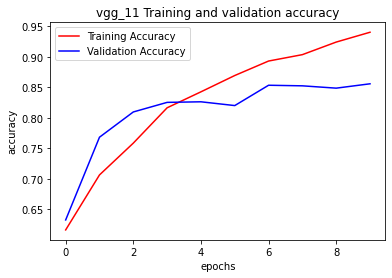

In [9]:
plot_model(0,'vgg_11')

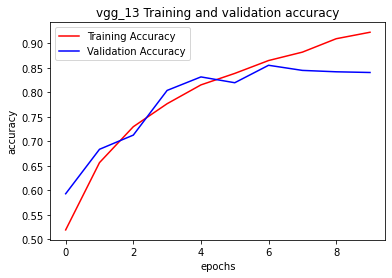

In [10]:
plot_model(1,'vgg_13')

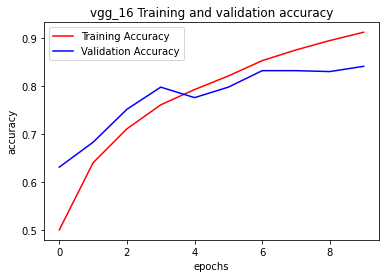

In [11]:
plot_model(2,'vgg_16')

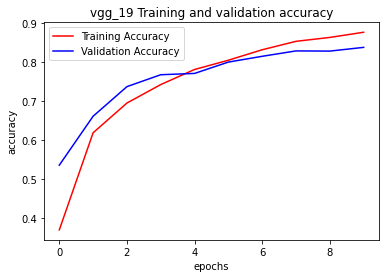

In [12]:
plot_model(3,'vgg_19')

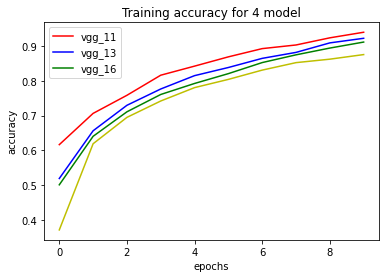

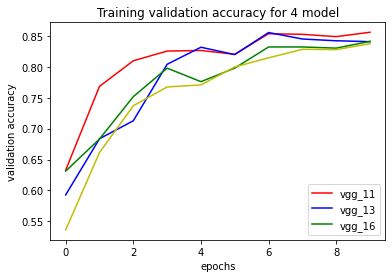

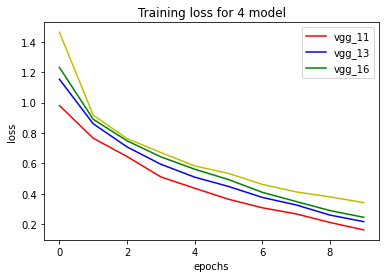

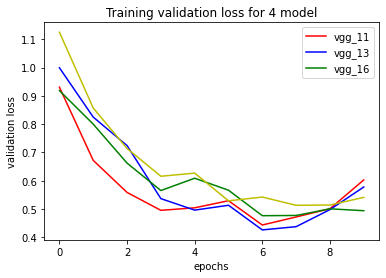

In [15]:
plot_4_models(acc,'accuracy')
plot_4_models(val_acc,'validation accuracy')
plot_4_models(loss,'loss')
plot_4_models(val_loss,'validation loss')

some peices of code that i did'nt use them here but they are important for saving models and reloads them to predict a new test images

In [ ]:
###########Save a model in some path, load it again,check it's architecture,evaluate the resored model 
########### and predict test images on it ########

# Create and train a new model instance.
model = create_model()
model.fit(train_images, train_labels, epochs=5)

# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('/content/drive/MyDrive/Colab Notebooks/VGG16/my_model')
# --------------------------------------------------------
# my_model directory
ls saved_model

# Contains an assets folder, saved_model.pb, and variables folder.
ls saved_model/my_model
# ------------------------------------------------------------
new_model = tf.keras.models.load_model('saved_model/my_model')

# Check its architecture
new_model.summary()
# ------------------------------------------------------
# Evaluate the restored model
loss, acc = new_model.evaluate(test_images, test_labels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

print(new_model.predict(test_images).shape)

In [ ]:
predict_11 = model_11.predict(test_generator,batch_size=20,verbose=1)
predict_13 = model_13.predict(test_generator,batch_size=20,verbose=1)
predict_16 = model_16.predict(test_generator,batch_size=20,verbose=1)